# Linear Regression

In [49]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression

import seaborn as sns

plt.style.use('seaborn')

%matplotlib inline

## Introduction

**Regression Analysis** is a **parametric technique** meaning a set of parameters are used to **predict** the value of an unknown target variable (or dependent variable)  𝑦  based on one or more of known input features (or independent variables, predictors), often denoted by  𝑥 .

The term **linear** implies that the model functions along with a straight (or nearly straight) line.

**Simple Linear Regression** uses a single feature (one independent variable) to model a linear relationship with a target (the dependent variable) by fitting an optimal model (i.e. the best straight line) to describe this relationship.

**Multiple Linear Regression** uses more than one feature to predict a target variable by fitting the best linear relationship.

### Assumptions

**1. Linearity**

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

As an extra measure, it is also important to check for outliers as the presence of outliers in the data can have a major impact on the model.

**2. Normality**

The normality assumption states that the model residuals should follow a normal distribution.

In the context of normality of residuals, Q-Q plots can help you validate the assumption of normally distributed residuals. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. 

**3. Homoscedasticity**

A dependent variable's variability is equal across values of the independent variable. 

## Simple linear regression

A straight line can be written as :
$$ 𝑦=𝛽_0+𝛽_1𝑥 $$

There are **4 key components** :
- A **dependent variable** that needs to estimated and predicted (here:  𝑦 )
- An **independent variable**, the input variable (here:  𝑥 )
- The **slope** which determines the angle of the line (here: $𝛽_1$ ).
- The **intercept** which is the constant determining the value of  𝑦  when  𝑥  is 0. We denoted the intercept here as $𝛽_0$ .

When we draw our regression line, we use the following notations:

$$ 𝑦̂ =𝛽̂_0+𝛽̂_1𝑥 $$
 
As you can see, you're using a "hat" notation which stands for the fact that we are working with **estimations**.

### Steps

Calculate the following:

- The mean of the X  ($ \bar X $) 
- The mean of the Y  ($ \bar Y $) 
- The standard deviation of the X values  ($ 𝑆_𝑋 $) 
- The standard deviation of the y values  ($ 𝑆_𝑌 $) 
- The correlation between X and Y ( often denoted by the Greek letter "Rho" or  𝜌  - Pearson Correlation)

**Calculating Slope**

With the above ingredients in hand, we can calculate the slope (shown as  𝑏  below) of the best-fit line, using the formula:

$$ 𝛽̂_1 =𝜌\frac{𝑆_Y}{𝑆_𝑋} $$
 
This formula is also known as the **least-squares** method.

 It can be shown that this is also equal to:

$$ 𝛽̂_1 = \frac{ \bar x ∗\bar y - \bar{xy}}{( \bar x)^2 -\bar{(x^2)}} $$


**Calculating the intercept**

Now that we have the slope value ($𝛽̂_1$ ), we can put it back into our formula  ($ 𝑦̂ =𝛽̂_0+𝛽̂_1𝑥 $ )  to calculate intercept.

$$ 𝛽̂_0 = \bar Y −  𝛽̂_1 \bar X $$ 

**Predicting from the model**

When you have a regression line with defined parameters for slope and intercept as calculated above, you can easily predict the  𝑦̂   (target) value for a new  𝑥  (feature) value using the estimated parameter values:

$$ 𝑦̂ = 𝛽̂_1 𝑥+ 𝛽̂_0 $$
 
Remember that the difference between y and  𝑦̂   is that  𝑦̂   is the value predicted by the fitted model, whereas  𝑦  carries actual values of the variable (called the truth values) that were used to calculate the best fit.

### Example

In [2]:
# Initialize vectors X and Y with given values
# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

In [3]:
def calc_slope(xs,ys):
    
    # Use the slope formula above and calculate the slope
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(X,Y)

0.5393518518518512

In [4]:
def best_fit(xs,ys):
    
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X,Y)
m, c
# (0.5393518518518512, 6.379629629629633)

(0.5393518518518512, 6.379629629629633)

In [5]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

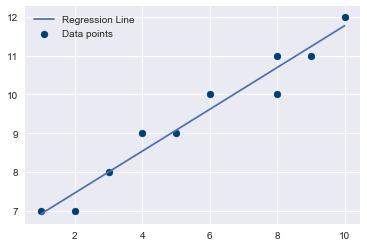

In [6]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()
plt.show()

### Helper functions

In [7]:
def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def best_fit(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.legend(loc=4)
    plt.show()
    return None

## Coefficient of Determination

The $ R^2 $ or Coefficient of determination is a statistical measure that is used to assess the goodness of fit of a regression model.

$R^2$ explains how good our model is wheh compared to the baseline model, which is the horizontal line obtained by taking the mean of all observed responses of the dependent variable, ignoring the independent variables.

### Calculating R-squared

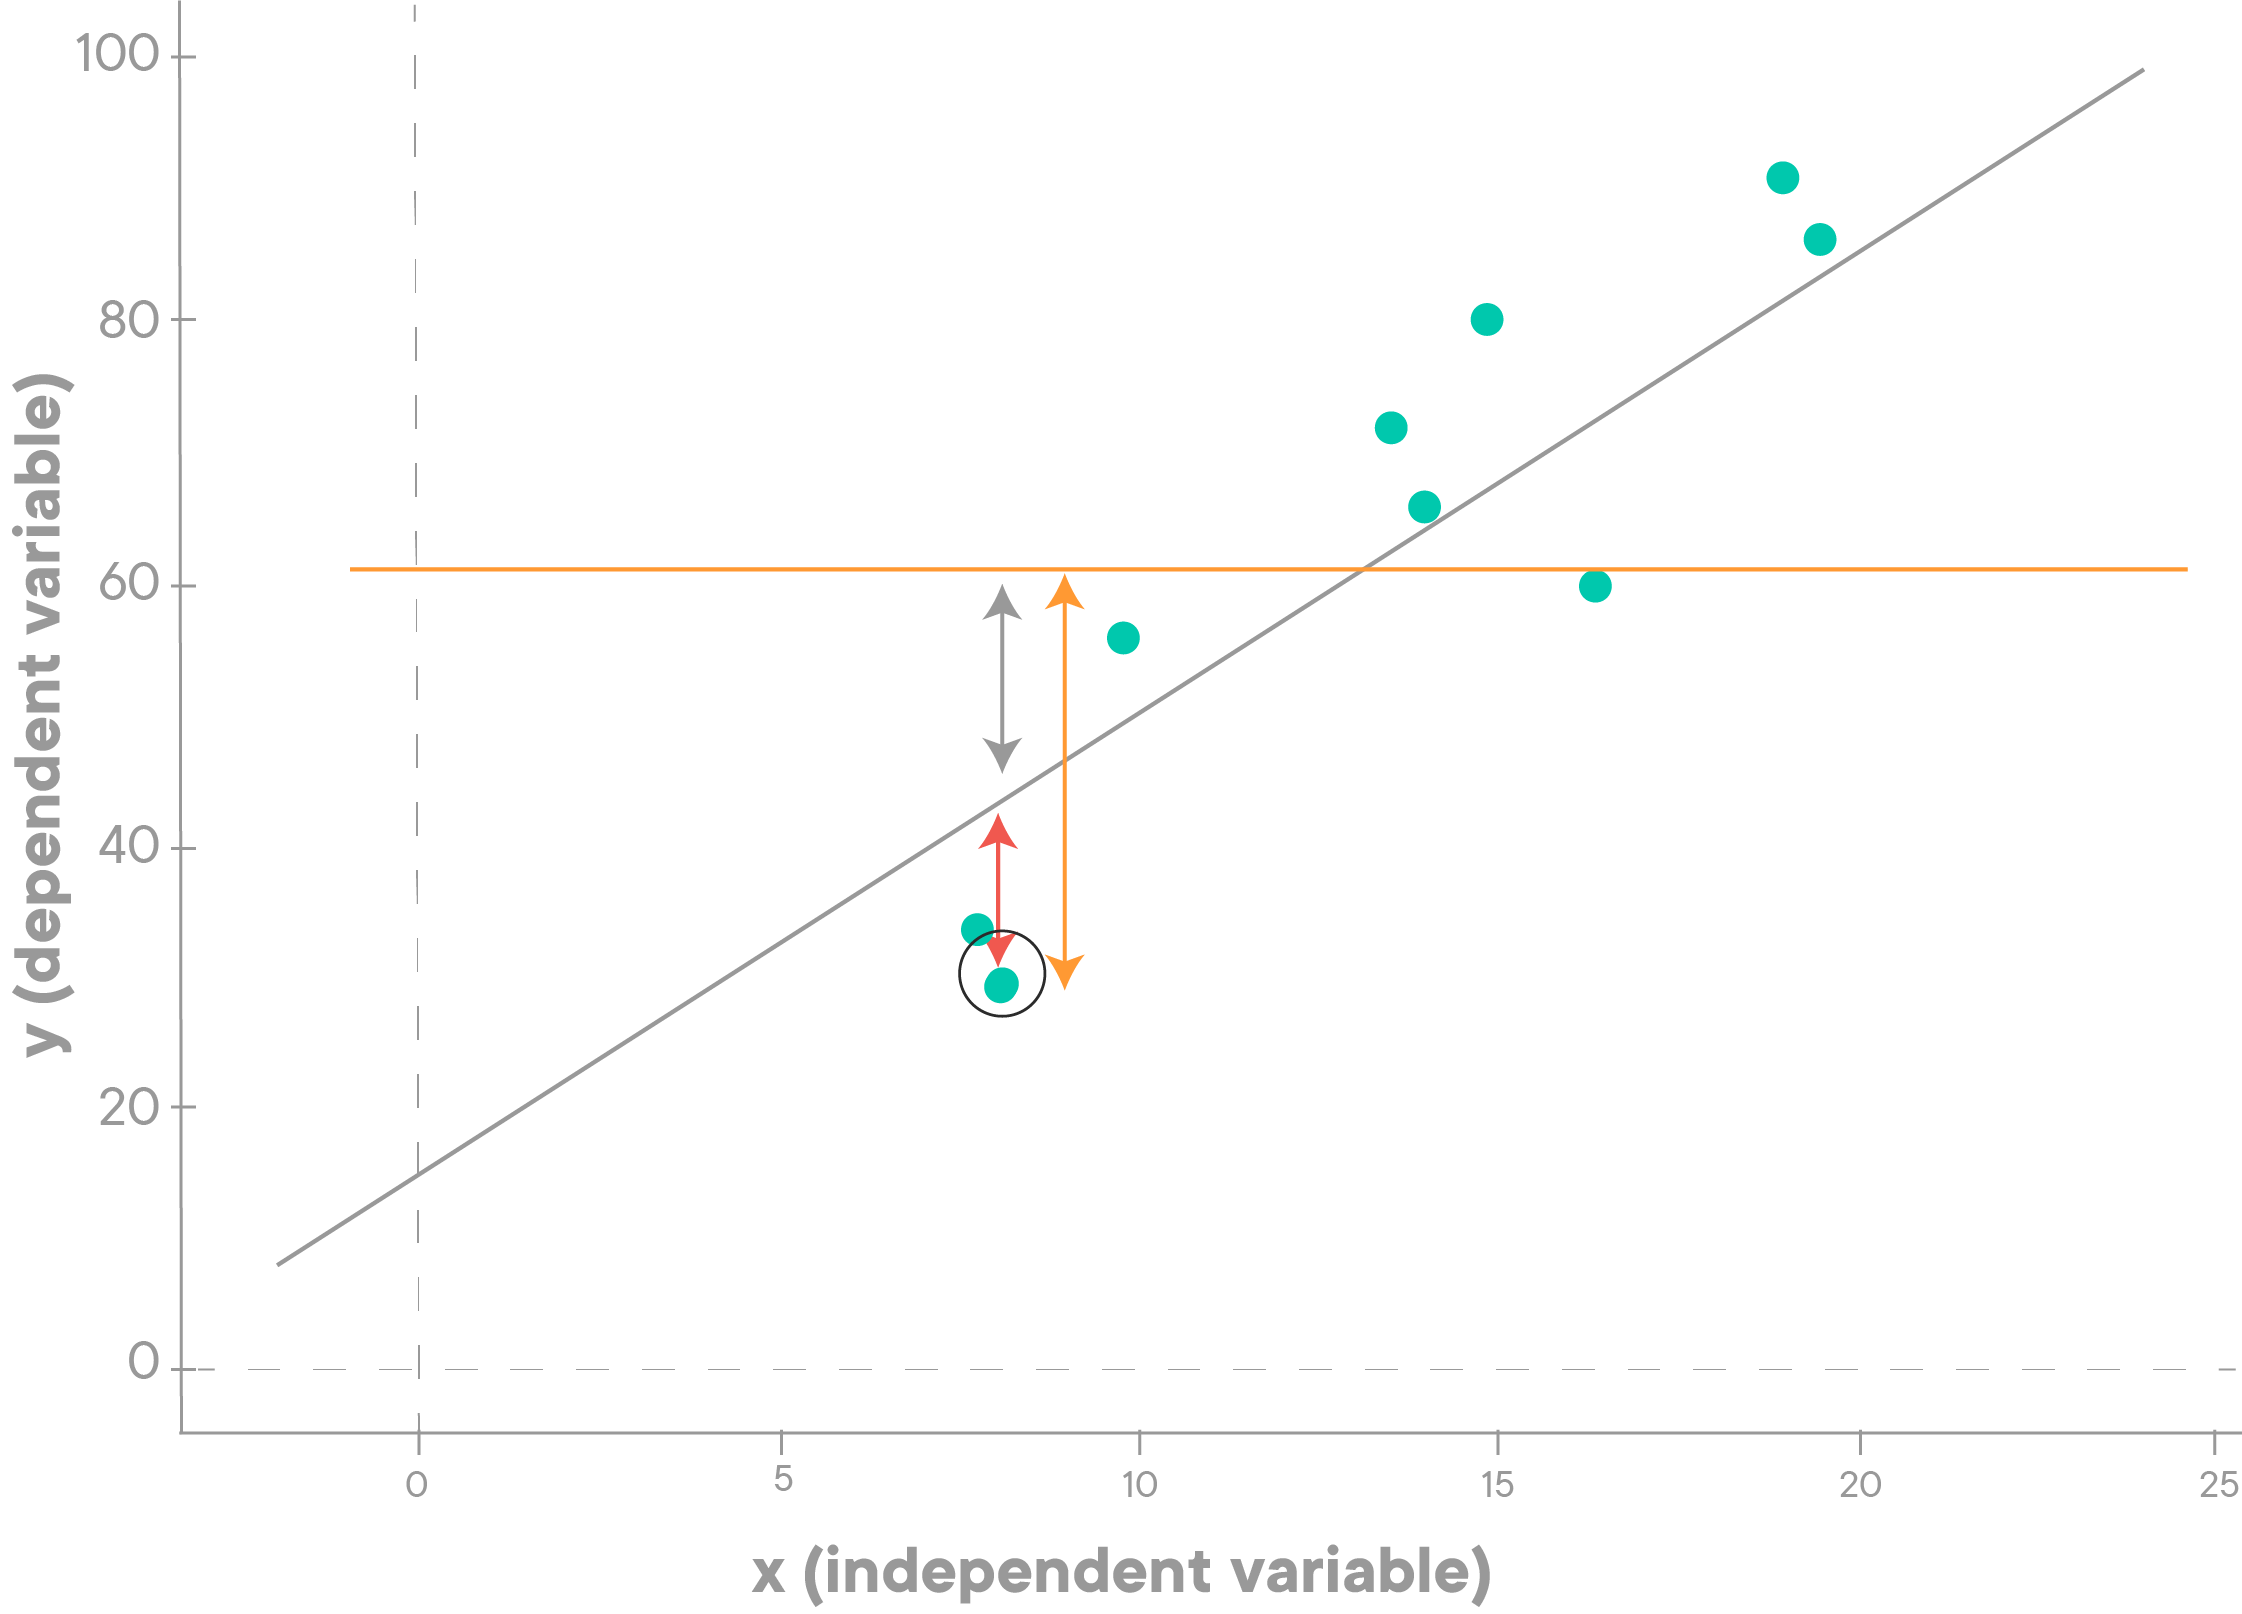

The mathematical formula to calculate R-Squared for a linear regression line is in terms of **squared errors** for the fitted model and the baseline model. It's calculated as :

$$ \large R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $$

* $SS_{RES}$ (also called RSS) is the **Residual** sum of squared errors of our regression model also known as **$SSE$** (Sum of Squared Errors). $SS_{RES}$ is the squared difference between $y$ and $\hat y$. For the one highlighted observation in our graph above, the $SS_{RES}$ is denoted by the red arrow. This part of the error is not explained by our model.


* $SS_{TOT}$ (also called TSS) is the **Total** sum of squared error. $SS_{TOT}$ is the squared difference between $y$ and $\overline y$. For the one highlighted observation in our graph above, the $SS_{TOT}$ is denoted by the orange arrow.

For completion, 

* $SS_{EXP}$ (also called ESS) is the **Explained** sum of squared error. $SS_{EXP}$ is the squared difference between $\hat y$ and $\overline y$. For the one highlighted observation in our graph above, the $SS_{EXP}$ is denoted by the gray arrow.

### Interpretting R-squared

R-Squared can take a value between 0 and 1 where values closer to 0 represent a poor fit and values closer to 1 represent an (almost) perfect fit.

An R-squared value of say 0.85 can be described conceptually as:
*85% of the variations in dependent variable y are explained by the independent variable in our model.*

As a rule of thumb, would want R-squared of at least 0.7 or at least 0.8/0.85 ideally.

## Using statsmodels OLS

In statistics, ordinary least square (OLS) regression is a method for estimating the unknown parameters in a linear regression model. It minimizes the sum of squared vertical distances between the observed values and the values predicted by the linear approximation. 

Statsmodels allows users to fit statistical models using R-style formulas. The formula framework is quite powerful and for simple regression it is written using a ~ as `Y ~ X`

### Example

In [8]:
df = pd.read_csv('height-weight.csv')
df.head()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


In [9]:
f = 'weight~height'
model = ols(formula=f, data=df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

R-Squared: 0.955309928867367
Intercept   -204.483436
height         5.539019
dtype: float64


In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Tue, 14 Apr 2020   Prob (F-statistic):           1.35e-13
Time:                        11:55:41   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X_new = pd.DataFrame({'height' : [df['height'].min(), df['height'].max()]})
X_new.head()

,height
0,58
1,74


In [12]:
preds = model.predict(X_new)
preds

0    116.779680
1    205.403988
dtype: float64

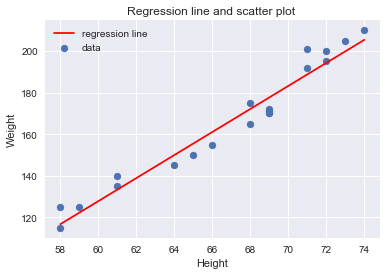

In [13]:
plt.scatter(df['height'], df['weight'], label = 'data')
plt.plot(X_new, preds, label = 'regression line', color = 'red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title ('Regression line and scatter plot ')
plt.legend()
plt.show()

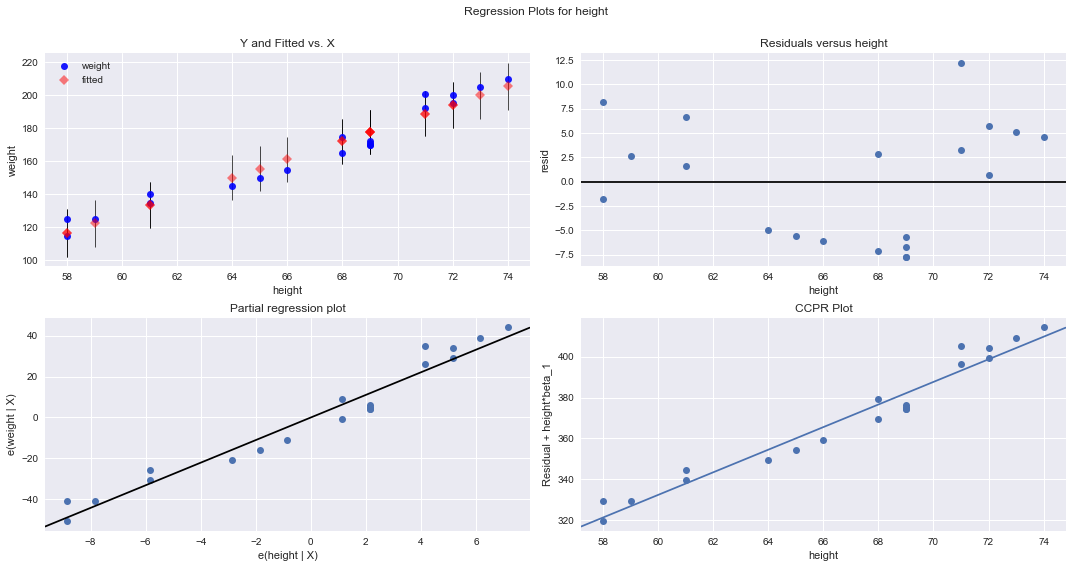

In [14]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()

For the four graphs we see above:

The **Y and Fitted vs. X** graph plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that height and weight are correlated, i.e., when one variable increases the other increases.

The **Residuals versus height** graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

The **Partial regression plot** shows the relationship between height and weight, taking in to account the impact of adding other independent variables on our existing height coefficient. You'll later learn how this same graph changes when you add more variables.

The **Component and Component Plus Residual (CCPR)** plot is an extension of the partial regression plot. It shows where the trend line would lie after adding the impact of adding our other independent variables on the weight.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


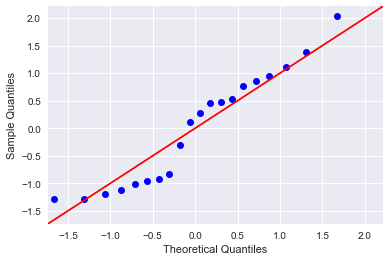

In [15]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

To check for the normality assumption, you can obtain error terms (residuals) from the model and draw Q-Q Plot against a standard normal distribution as shown above. While the residuals do not seem to match up perfectly with the red line, there seem to be no super clear deviations from the red line. So can assume that you're OK for the normality assumption.

### Regression Diagnostics in Statsmodels

**Normality Check (Jarque-Bera Test)**

This test is usually used for large data sets, because other tests like Q-Q Plots can become unreliable when your sample size is large.

The Jarque-Bera test inspects the skewness and kurtosis of data to see if it matches a normal distribution. It is a common method for inspecting errors distribution in regression as shown below.

In [16]:
# JB test
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

[('Jarque-Bera', 1.244868352867404),
 ('Prob', 0.5366365783478978),
 ('Skew', 0.201677957358359),
 ('Kurtosis', 1.8462469807173094)]

A JB value of roughly 6 or higher indicates that errors are not normally distributed. In other words, this means that the normality null hypothesis has been rejected at the  5%  significance level. A value close to 0 on the contrary, indicates the data *is* normally distributed.

**Checking Heteroscadasticity (Goldfeld-Quandt test)**

The Goldfeld Quandt (GQ) test is used in regression analysis to check for homoscedasticity in the error terms. The GQ test checks if you can define a point that can be used to differentiate the variance of the error term. It is a parametric test and uses the assumption that the data is normally distributed. So it is general practice to check for normality before going over to the GQ test!

In [17]:
#name = ['F statistic', 'p-value']
#test = sms.het_goldfeldquandt(model.resid, model.exog)
#lzip(name, test)

## Multiple Linear Regression

Write a multiple linear regression model as follows:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

where $n$ is the number of predictors, $\beta_0$ is the intercept, $\beta_i$ are the slope parameters associated with a particular predictor $x_i$ and $\hat y$ is the so-called "fitted line" or the predicted value associated with the dependent variable.


## Dealing with Categorical Variables

Here are two methods (label encoding and dummy variables) but note that **the dummy variables/ one-hot encoding method is required for most algorithms.**

### Label Encoding

In [18]:
# Sample series
origin = ['USA', 'EU', 'EU', 'ASIA','USA', 'EU', 'EU', 'ASIA', 'ASIA', 'USA']
origin_series = pd.Series(origin)

In [19]:
# Change to category type
cat_origin = origin_series.astype('category')
cat_origin

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): [ASIA, EU, USA]

Using `cat.codes` to transform into numerical value

In [20]:
cat_origin.cat.codes

0    2
1    1
2    1
3    0
4    2
5    1
6    1
7    0
8    0
9    2
dtype: int8

Alternatively, use scikit-learn's `LabelEncoder`. This does not require the first step of transforming to category type.

In [21]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

origin_encoded = lb_make.fit_transform(cat_origin)
origin_encoded

array([2, 1, 1, 0, 2, 1, 1, 0, 0, 2])

### Dummy variables

Another way to transform categorical variables is through using one-hot encoding or "dummy variables".

In [22]:
pd.get_dummies(cat_origin)

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


Alternatively, use scikit-learn's `LabelBinarizer`.

In [23]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# You need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
origin_dum_df

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


The **dummy variable trap**: one variable can be predicted from all the others (by doing 1 minus the sum of the others). This is known as perfect **multicollinearity**. Need to drop one of the dummy variables.

In [24]:
# Remove first column
pd.get_dummies(cat_origin, drop_first=True)

,EU,USA
0,0,1
1,1,0
2,1,0
3,0,0
4,0,1
5,1,0
6,1,0
7,0,0
8,0,0
9,0,1


The dropped category becomes what is known as the **reference category**. The regression coefficients that result from fitting the remaining variables represent the change relative to the reference.

### Detailed example

In [25]:
data = pd.read_csv('auto-mpg.csv')
# First convert horsepower into a string and then to int
#data['horsepower'].astype(str).astype(int)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [26]:
# create dummy variables for categorical data

cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)

In [27]:
# remove original columns for cylinders, model year and origin
data = data.drop(['cylinders','model year','origin'], axis=1)

In [28]:
# 'rebuild' dataframe
data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)
data.head()

,mpg,displacement,horsepower,weight,acceleration,car name,cyl_4,cyl_5,cyl_6,cyl_8,...,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,orig_2,orig_3
0,18.0,307.0,130,3504,12.0,chevrolet chevelle malibu,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165,3693,11.5,buick skylark 320,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150,3436,11.0,plymouth satellite,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150,3433,12.0,amc rebel sst,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140,3449,10.5,ford torino,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Using `pd.cut` for bins

In [29]:
# Example from Boston Housing

#boston_df['TAX'].describe()
#bins = [0, 250, 300, 400, 600, 715]
#bins_tax = pd.cut(boston_df['TAX'], bins)
#bins_tax = bins_tax.cat.as_ordered()
#bins_tax.value_counts().plot(kind='bar')
#boston_df['TAX'] = bins_tax
#tax_dummies = pd.get_dummies(bins_tax, prefix='tax', drop_first=True)

## Multicolinearity

The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant.

Correlation is a problem, because it indicates that changes in one predictor are associated with changes in another one as well. Because of this, the estimates of the coefficients can have big fluctuations as a result of small changes in the model. 

In [30]:
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [31]:
data_pred = data.iloc[:,1:8]
data_pred.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


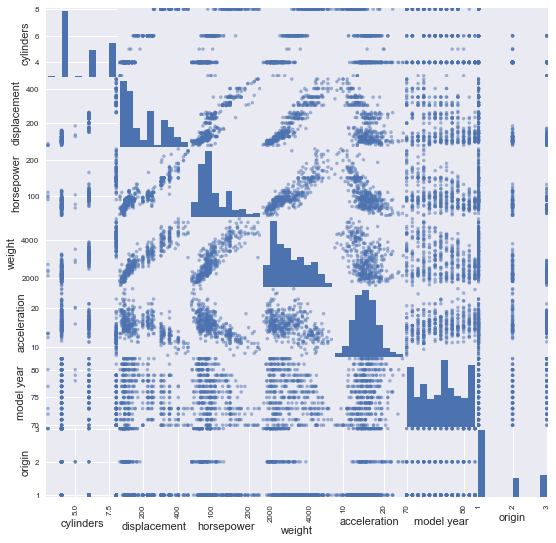

In [32]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()

In the plots above, look for linear relationship

In [33]:
data_pred.corr()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation.

In [34]:
abs(data_pred.corr()) > 0.75


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
cylinders,True,True,True,True,False,False,False
displacement,True,True,True,True,False,False,False
horsepower,True,True,True,True,False,False,False
weight,True,True,True,True,False,False,False
acceleration,False,False,False,False,True,False,False
model year,False,False,False,False,False,True,False
origin,False,False,False,False,False,False,True


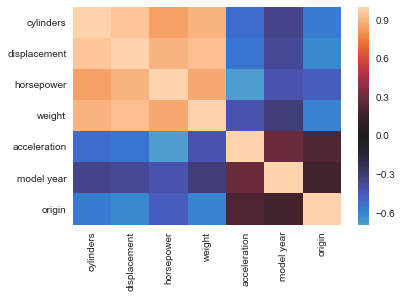

In [37]:
# visual correlation heatmap
sns.heatmap(data_pred.corr(), center=0);

## Log Transformations

Applying log transforms results in having more "normal" data distributions for the input features. Improves $R^2$.

Log transformation can help reduce skewness when you have skewed data, and can help reducing variability of data.

In [38]:
data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [39]:
outcome = 'mpg'
x_cols = ['displacement', 'horsepower', 'weight', 'acceleration']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          9.63e-102
Time:                        11:57:07   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

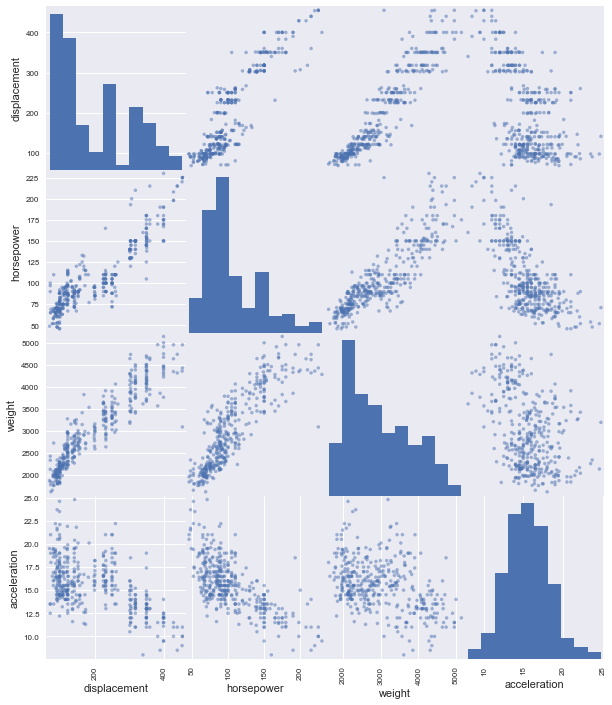

In [40]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [41]:
# only acceleration looks to be normal

In [42]:
# transform non_normal variables
non_normal = ['displacement', 'horsepower', 'weight']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))

In [43]:
# improves R-squared

## Feature scaling

Often, your dataset will contain features that vary largely in magnitudes. If you leave these magnitudes unchanged, coefficient sizes will fluctuate largely in magnitude as well. This can give the false impression that some variables are less important than others.

A good rule of thumb is to check your features for normality, and while you're at it, scale your features so they have similar magnitudes, even for a "simple" model like linear regression.

In addition to log transformations, other popular transformations are:

**Min-max scaling**

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings all values between 0 and 1. 

**Standardization**

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

**Mean normalization**

When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values between -1 and 1, and a mean of 0.

**Unit vector transformation**

 When performing unit vector transformations, you can create a new variable x' with a range [0,1]:
 
$$x'= \dfrac{x}{{||x||}}$$


Recall that the norm of x $||x||= \sqrt{(x_1^2+x_2^2+...+x_n^2)}$

## Linear Regression Models

### Using statsmodels

In [45]:
X = pd.concat([cyl_dummies, yr_dummies, data['acceleration']], axis = 1)
X.head()

,cyl_4,cyl_5,cyl_6,cyl_8,yr_71,yr_72,yr_73,yr_74,yr_75,yr_76,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82,acceleration
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,12.0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.5
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,12.0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10.5


In [47]:
y = data['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [48]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     80.60
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          1.34e-113
Time:                        12:01:32   Log-Likelihood:                -1059.4
No. Observations:                 392   AIC:                             2155.
Df Residuals:                     374   BIC:                             2226.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.1111      2.239      8.089      0.000      13.709      22.514
cyl_4            7.4204      1.911      3.883      0.000       3.663      11.178
cyl_5            3.2213      2.890      1.115      0.266      -2.461       8.904
cyl_6           -0.5955      1.944     -0.306      0.760      -4.418       3.227
cyl_8           -4.0980      1.907     -2.149      0.032      -7.847      -0.349
yr_71            0.4623      1.006      0.460      0.646      -1.515       2.440
yr_72           -1.6870      0.999     -1.688      0.092      -3.652       0.278
yr_73           -1.3403      0.909     -1.475      0.141      -3.127       0.446
yr_74            0.7866      1.030      0.764      0.446      -1.239       2.812
yr_75           -0.2669      0.996     -0.268      0.789      -2.225       1.691
yr_76            0.9400      0.962      0.977      0.329      -0.952       2.832
yr_77            2.3384      1.002      2.334      0.020       0.369       4.308
yr_78            2.7337      0.955      2.863      0.004       0.856       4.611
yr_79            4.8322      0.995      4.857      0.000       2.876       6.788
yr_80            8.7533      1.056      8.292      0.000       6.678      10.829
yr_81            6.5487      1.025      6.388      0.000       4.533       8.565
yr_82            6.7433      1.021      6.606      0.000       4.736       8.751
acceleration     0.0319      0.085      0.374      0.708      -0.136       0.199
==============================================================================
Omnibus:                       21.705   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.868
Skew:                           0.417   Prob(JB):                     1.20e-07
Kurtosis:                       4.120   Cond. No.                         369.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using scikit-learn

In [50]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
linreg.coef_

array([ 7.42036468,  3.22131016, -0.59551217, -4.09798408,  0.46234833,
       -1.68696072, -1.3402816 ,  0.78661119, -0.26689031,  0.9400096 ,
        2.33839844,  2.73365708,  4.83215911,  8.75334202,  6.54870143,
        6.74333337,  0.03190619])

In [52]:
linreg.intercept_

18.111118498773273